# Chapter 2. Data and Sampling Distributions  
# (데이터와 표본분포)

데이터의 질과 적합성을 일정 수준 이상으로 담보할 수도 없으면서 데이터 크기만 늘어나는 것이 오늘날 상황이다.
다양한 데이터를 효과적으로 다루고 데이터 편향을 최소화하기 위한 방법으로 **표본추출의 필요성이 더 커지고 있다.**

라이브러리 불러오기

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
import os
os.chdir('C:\\Users\\my\\Desktop')

평균과 같은 표본통계량의 분포는 데이터 자체의 분포보다 규칙적이고 종 모양일 가능이 높다. 또한 표본이 클 수 록 표본통계랑의 분포가 좁아진다.

In [3]:
loans_income = pd.read_csv("data/loans_income.csv",squeeze=True) # sqeeze 로우가 하나뿐이라면 Series객체를 반환한다
loans_income.head(3)

0     67000
1     52000
2    100000
Name: x, dtype: int64

In [4]:
#sample  표본추출 

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
15058  110000.0  Data
16777   45734.0  Data
42453   70000.0  Data
46122   85000.0  Data
28217   90000.0  Data


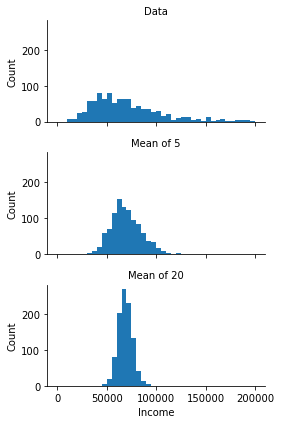

In [5]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

이는 중심극한정리를 말한다. 모집단이 정규분포가 아니더라도 , 표본크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 여러 표본에서 추출한 평균은 종모양의 정규곡선을 따른다. 

## The Bootstrap(부스트트랩)
> 통계랑이나 모델 파라미터(모수)의 표본분포를 추정하는 쉽고 효과적인 방법은 , 현재 있는 표본에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것이다. 이러한 절차를 부스트트랩이라 하며, 데이터나 표본통계량이 정규분포를 따라야한다는 가정은 꼭 필요하지 않다.

In [6]:
results = []

for n in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())

results = pd.Series(results)


print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -71.26049999999668
std. error: 216.95317021840916


## Confidence Intervals(신뢰구간)
> 신뢰구간은 구간 범위로 추정값을 표시하는 일반적인 방법  
  더 많은 데이터를 보유할 수록 표본추정치의 변이가 줄어든다.  
  허용할 수 있는 신뢰수준이 낮을 수록 신뢰구간은 좁아진다.  
  부트스트랩은 신뢰구간을 구성하는 효과적인 방법
  
  * 신뢰수준 - 신뢰구간과 관련된 백분율, 신뢰수준이 높을수록 구간이 넓어진다. 표본이 작을 수록 구간이 넓다.(불확실성이 더 커짐) 

68760.51844
55734.1


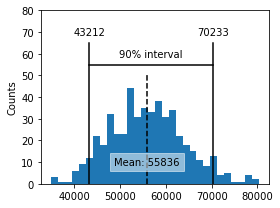

In [7]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

## Normal Distribution(정규분포)
### Standard Normal and QQ-Plots(표준정규분포와 QQ그림)
표준정규분포는 x축의 단위가 평균의 표준편차로 표현되는 정규분포이다.데티어를 표준정규분포와 비교하려면 데이터에서 평균 뺀 다음 표준편차로 나누면 된다. 이를 정규화 , 표준화라고 한다. 이렇게 변환한 값을 z점수라고하며 z분포라고도 한다.  
QQ그림은 표본이 특정 분포에 얼마나 가까운지를 시각적으로 판별하는데 사용된다. z점수를 오름차순으로 정렬하고 각 값의 z점수를 y축에 표시
x축은 정규분포에서의 해당 분위수를 나타낸다.

QQplot을 그리기 위해서는 scipy.stats.probplot 필요하다

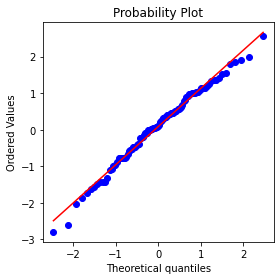

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

## Long-Tailed Distributions(긴 꼬리 분포)
>  오차나 표본통계랑의 분포를 볼 때 정규분포는 적절하고 유용하지만 , 정규분포가 일반적으로 원시 데이터의 분포의 특징을 나타내지는 않는다.
   분포가 소득데이터와 같이 비스틈하게 기울어져 있거나 이항 데이터같이 이산적일 수 있다. 대칭 및 비대칭 분포 모두 긴꼬리를 가질 수 있다.
   분포의 꼬리는 양 극한값에 해당한다.

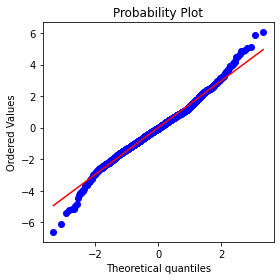

In [9]:
sp500_px = pd.read_csv("data/sp500_data.csv")

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax) # stats.probplot 함수를 통해서 주어진 데이터와 정류분포와의 QQ plot을 그릴 수 있다.

plt.tight_layout()
plt.show()

낮은 값의 점들은 대각선보다 훨씬 낮고 높은 값은 선보다 훨씬 위에 위치, 데이터가 정규분포를 따르지 않는다는 것을 의미  
데이터가 정규분포를 따른다고 할때 예상되는 것보다 훨씬 더 많은 극단값을 관찰할 가능성이 있음을 의미한다.

## Binomial Distribution(이항분포)
각 시행마다 그 성공확률이(P)가 정해져 있을때 , 주어진 시행횟수(N)중에서 성공한 횟수(x)의 도수분포를 의미한다.   
이항분포의 평균은 n X p , 분산은 n X p (1-p)

In [10]:
print(stats.binom.pmf(2, n=5, p=0.1)) 
# size = 5 인 시행에서 각 시행의 성공확률이 p = 0.1일때 정확히 x=2 성공이 나올 확률을 의미 

0.0729


In [11]:
print(stats.binom.cdf(2, n=5, p=0.1))
#  성공확률이 0.1인 시행을 다섯번 했을때 두번이하의 성공을 관찰할 확률을 의미 

0.99144


## Poisson and Related Distribution(푸아송분포와 그 외 관련 분포들)
### Poisson Distributions
시간 단위 또는 공간 단위로 표본들을 수집할때, 그  사건들의 분포를 알려준다. '5초 동안 서버에 도착한 인터넷 트래픽을 95%의 확률로 완벽하게 처리하는데 필요한 용량을 얼마일까? 같은 대기행렬 관련 질문을 처리할때  유용  
푸아송 분포의 핵심 파라미터는 람다이다. 람다는 어떤 일정시간/공간의 구간 안에서 발생한 평균 사건 수를 의미 ,푸아송 분포의 분산역시 람다

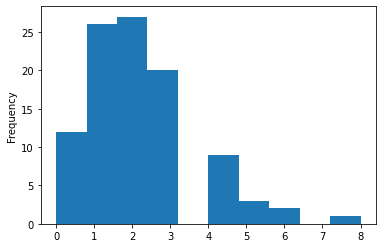

In [12]:
# 푸아송분포를 나타내기 위해서는 scipy 의 stats.poisson.rvs 사용

sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

## Exponential Distribution(지수분포)
푸아송 분포에서 사용된 것과 동일한 변수 람다를 사용하여 사건과 사건간의 시간분포를 모델링 할 수 있다.

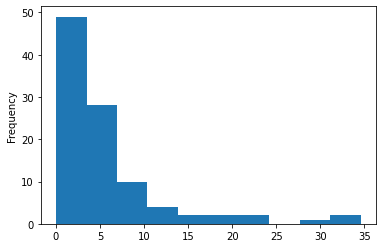

In [13]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

위의 코드는 주기별 평균 사건 수가 0.2인 지수분포에서 난수 100개를 생성 , 분당 평균적으로 0.2회 서비스 문의 전화가 걸려오는 경우 ,100분 동안의 서비스 센터 문의 전화를 시물레이션

##  Weibull Distribution(베이불 분포)
베이불 분포는 지수분포를 확장한 것으로 형상 파라미터(베타)로 지정된 대로 발생률이 달라 질 수 있다. B > 1일 경우 발생률은 시간이 지남에 따라 증가하며 B < 1이면 감소한다. 베이불 분포는 사건 발생률 대신 고장 시간 분석에 사용되기 때문에 두번째 인수는 구간당 사건 발생률보다는 특성 수명으로 표현된다. 기호로 그리스 문자 n(에타)를 사용 , 척도변수라고도 한다.

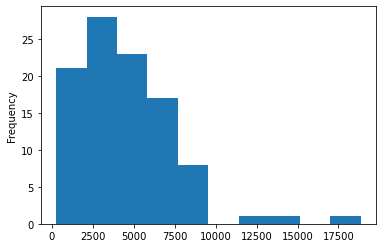

In [14]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()